<a href="https://colab.research.google.com/github/jumbokh/python_learn/blob/master/notebooks/tele_camp_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import os
#os.chdir(r"E:\EDU\Book\XB1850\Python_book\6Inference")

In [2]:
import pandas as pd

In [3]:
house_price_gr = pd.read_csv(r'house_price_gr.csv', encoding='gbk')
house_price_gr.head()

,dis_name,rate
0,东城区甘南小区,0.169747
1,东城区察慈小区,0.165484
2,东城区胡家园小区,0.141358
3,东城区台基厂小区,0.063197
4,东城区青年湖小区,0.101528


#### ## 6.1 参数估计
#### 进行描述性统计分析

In [4]:
house_price_gr.describe(include='all')

,dis_name,rate
count,150,150.000000
unique,150,NaN
top,东城区甘南小区,NaN
freq,1,NaN
mean,NaN,0.110061
std,NaN,0.041333
min,NaN,0.029540
25%,NaN,0.080027
50%,NaN,0.104908
75%,NaN,0.140066


In [5]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
%matplotlib inline
import seaborn as sns
from scipy import stats

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


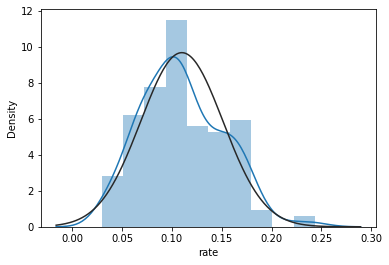

In [7]:
sns.distplot(house_price_gr.rate, kde=True, fit=stats.norm)

In [8]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


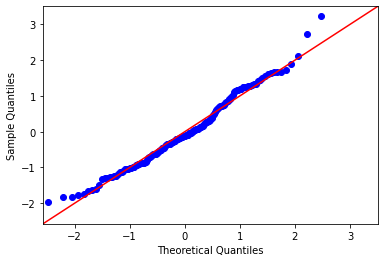

In [9]:
fig = sm.qqplot(house_price_gr.rate, fit=True, line='45')
fig.show()

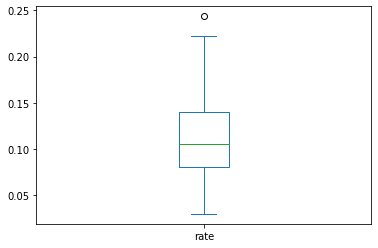

In [10]:
house_price_gr.plot(kind='box') # Box Plots

#### # 置信度区间估计

In [11]:
se = house_price_gr.rate.std() / len(house_price_gr) ** 0.5
LB = house_price_gr.rate.mean() - 1.98 * se
UB = house_price_gr.rate.mean() + 1.98 * se
(LB, UB)

(0.10337882853175007, 0.11674316487209624)

#### # 如果要求任意置信度下的置信区间的话，可以自己编一个函数

In [12]:
def confint(x, alpha=0.05):
    n = len(x)
    xb = x.mean()
    df = n-1
    tmp = (x.std() / n ** 0.5) * stats.t.ppf(1-alpha/2, df)
    return {'Mean': xb, 'Degree of Freedom':df, 'LB':xb-tmp, 'UB':xb+tmp}

confint(house_price_gr.rate, 0.05)

{'Degree of Freedom': 149,
 'LB': 0.10339228338892809,
 'Mean': 0.11006099670192315,
 'UB': 0.11672971001491822}

#### # 或者使用DescrStatsW

In [13]:
d1 = sm.stats.DescrStatsW(house_price_gr.rate)
d1.tconfint_mean(0.05) # 

(0.10339228338892816, 0.11672971001491829)

#### # ## 6.2 假设检验与单样本T检验
#### 当年住宅价格的增长率是否超过了10%的阈值

In [14]:
d1 = sm.stats.DescrStatsW(house_price_gr.rate)
print('t-statistic=%6.4f, p-value=%6.4f, df=%s' %d1.ttest_mean(0.1))

t-statistic=2.9812, p-value=0.0034, df=149.0


#### #一般认为FICO高于690的客户信誉较高，请检验该产品的客户整体信用是否高于690
#### ## 6.3 两样本T检验
#### - 数据集描述与属性说明
#### - ID	客户编号
#### - Suc_flag	成功入网标识
#### - ARPU	入网后ARPU
#### - PromCnt12	12个月内的营销次数
#### - PromCnt36	36个月内的营销次数
#### - PromCntMsg12	12个月内发短信的次数
#### - PromCntMsg36	36个月内发短信的次数
#### - Class	客户重要性等级(根据前运营商消费情况)
#### - Age	年龄
#### - Gender	性别
#### - HomeOwner	是否拥有住房
#### - AvgARPU	当地平均ARPU
#### - AvgHomeValue	当地房屋均价
#### - AvgIncome	当地人均收入

### 导入数据

In [15]:
camp= pd.read_csv(r'tele_camp_ok.csv', skipinitialspace=True)
camp.head()

,ID,Suc_flag,ARPU,PromCnt12,PromCnt36,PromCntMsg12,PromCntMsg36,Class,Gender,Age,HomeOwner,AvgARPU,AvgHomeValue,AvgIncome,Age_empflag,AvgHomeValue_empflag,AvgIncome_empflag
0,250,1,75.0,6,11,2,4,3,M,53.0,H,50,33400.0,39460.00000,False,False,False
1,551,1,100.0,4,8,2,3,4,M,53.0,U,67,217000.0,53513.45736,False,False,True
2,793,1,75.0,4,9,1,2,3,M,53.0,H,49,37600.0,33545.00000,False,False,False
3,1102,1,55.0,8,12,2,4,3,F,53.0,H,49,100400.0,42091.00000,False,False,False
4,3550,1,50.0,7,10,1,1,3,F,53.0,H,47,39900.0,39313.00000,False,False,False


#### # 检验当地客户平均客户价值对是否入网的影响

In [16]:
camp['AvgARPU'].groupby(camp['Suc_flag']).describe()

,count,mean,std,min,25%,50%,75%,max
Suc_flag,,,,,,,,
0,4843.0,52.868057,5.005257,47.0,50.0,51.0,54.0,97.0
1,4843.0,52.944869,5.000584,46.0,50.0,51.0,55.0,99.0


#### # - 第一步:方差齐次检验

In [17]:
Suc0 = camp[camp['Suc_flag'] == 0]['AvgARPU']
Suc1 = camp[camp['Suc_flag'] == 1]['AvgARPU']
leveneTestRes = stats.levene(Suc0, Suc1, center='median')
print('w-value=%6.4f, p-value=%6.4f' %leveneTestRes)

w-value=0.2029, p-value=0.6524


#### # - 第二步:T-test

In [18]:
stats.stats.ttest_ind(Suc0, Suc1, equal_var=False)

Ttest_indResult(statistic=-0.7555218833042051, pvalue=0.4499542825572522)

#### Or Try: sm.stats.ttest_ind(gender0, gender1, usevar='pooled')

####测试一下营销次数对是否响应的作用.
#####camp['PromCnt12'].groupby(camp['Suc_flag']).describe()
#####Suc0 = camp[camp['Suc_flag'] == 0]['PromCnt12']
#####Suc1 = camp[camp['Suc_flag'] == 1]['PromCnt12']
#####leveneTestRes = stats.levene(Suc0, Suc1, center='median')
#####print('w-value=%6.4f, p-value=%6.4f' %leveneTestRes)
#####stats.stats.ttest_ind(Suc0, Suc1, equal_var=False)

#### ## 6.4 方差分析
#### - 单因素方差分析

In [19]:
pd.set_option('display.max_columns', None) # 设置显示所有列
camp.groupby('Class')[['ARPU']].describe().T

Class                 1            2            3            4
ARPU count  1270.000000  1581.000000  1064.000000   928.000000
     mean     42.048898    83.085863    96.749436    97.673761
     std      28.864797    56.904053    77.055780    64.426604
     min       5.000000     5.000000    10.000000    10.000000
     25%      25.000000    50.000000    55.000000    75.000000
     50%      30.000000    70.000000    75.000000   100.000000
     75%      50.000000   100.000000   100.000000   105.000000
     max     250.000000  1000.000000  1000.000000  1000.000000

#### # 利用回归模型中的方差分析

In [20]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
sm.stats.anova_lm(ols('ARPU ~ C(Class)',data=camp).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(Class),3.0,2.415503e+06,805167.668866,238.549647,2.341837e-144
Residual,4839.0,1.633290e+07,3375.262461,NaN,NaN


#### # - 多因素方差分析

In [22]:
# 不考虑交互相
sm.stats.anova_lm(ols('ARPU ~ C(Class)+C(Gender)',data=camp).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(Class),3.0,2.415503e+06,805167.668866,238.474362,2.607104e-144
C(Gender),2.0,1.596427e+03,798.213565,0.236415,7.894623e-01
Residual,4837.0,1.633130e+07,3376.328018,NaN,NaN


In [23]:
# In[16]:考虑交互相
sm.stats.anova_lm(ols('ARPU ~ C(Class)+C(Gender)+C(Class)*C(Gender)',data=camp).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(Class),3.0,2.415503e+06,805167.668866,238.382921,3.018528e-144
C(Gender),2.0,1.596427e+03,798.213565,0.236324,7.895339e-01
C(Class):C(Gender),6.0,1.400126e+04,2333.543580,0.690883,6.570291e-01
Residual,4831.0,1.631730e+07,3377.623134,NaN,NaN


#### ## 6.5 相关分析
#### 散点图

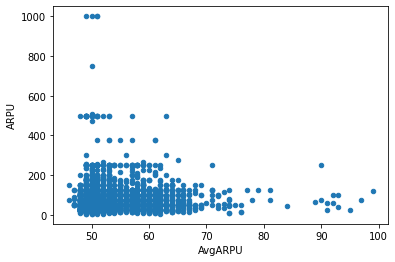

In [24]:
camp.plot(x='AvgARPU', y='ARPU', kind='scatter')

In [25]:
import numpy as np
camp['AvgARPU_ln']=np.log(camp['AvgARPU'])
camp['ARPU_ln']=np.log(camp['ARPU'])

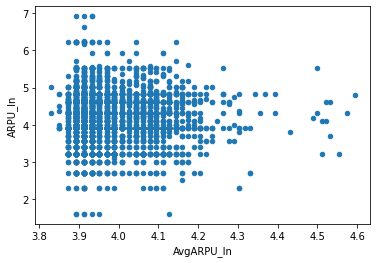

In [26]:
camp.plot(x='AvgARPU_ln', y='ARPU_ln', kind='scatter')

In [27]:
# 相关性分析:“spearman”,“pearson” 和 "kendall"

In [28]:
camp[['AvgARPU_ln', 'ARPU_ln']].corr(method='pearson')

,AvgARPU_ln,ARPU_ln
AvgARPU_ln,1.000000,0.008927
ARPU_ln,0.008927,1.000000


#### # ## 6.6卡方检验

In [29]:
cross_table = pd.crosstab(camp.Class, columns=camp.Suc_flag)

#### Or try this: accepts.pivot_table(index='bankruptcy_ind',columns='bad_ind', values='application_id', aggfunc='count')

In [30]:
cross_table

Suc_flag,0,1
Class,,
1,869,1270
2,1722,1581
3,1173,1064
4,1079,928


In [31]:
cross_table_rowpct = cross_table.div(cross_table.sum(1),axis = 0)
cross_table_rowpct

Suc_flag,0,1
Class,,
1,0.406265,0.593735
2,0.521344,0.478656
3,0.524363,0.475637
4,0.537618,0.462382


In [32]:
print('chisq = %6.4f\n p-value = %6.4f\n dof = %i\n expected_freq = %s'  %stats.chi2_contingency(cross_table))

chisq = 97.8667
 p-value = 0.0000
 dof = 3
 expected_freq = [[1069.5 1069.5]
 [1651.5 1651.5]
 [1118.5 1118.5]
 [1003.5 1003.5]]
